#  Income Data Analysis

In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import dataset from csv file

df = pd.read_csv("../DATA/income_data.csv")
df.head()

,Name,Age,Height,Gender,Income
0,Alice,25,5.5,F,30000
1,Bob,35,5.9,M,40000
2,Charlie,45,6.2,M,50000
3,Debbie,55,6.6,F,60000
4,Edward,65,6.1,M,70000


In [3]:
# Details of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    10 non-null     object 
 1   Age     10 non-null     int64  
 2   Height  10 non-null     float64
 3   Gender  10 non-null     object 
 4   Income  10 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 532.0+ bytes


In [4]:
# Check number of of both sexes

df['Gender'].value_counts()

Gender
M    6
F    4
Name: count, dtype: int64

In [5]:
# Edward's height

edward_height = df.loc[df['Name']=='Edward','Height']
print(f"Edward's height is {edward_height.iloc[0]}")

Edward's height is 6.1


In [6]:
# Female subset of the dataset

df_female = df.loc[df['Gender']=='F'].reset_index(drop=True)
df_female

,Name,Age,Height,Gender,Income
0,Alice,25,5.5,F,30000
1,Debbie,55,6.6,F,60000
2,Greta,76,6.3,F,90000
3,Ivy,60,6.7,F,110000


In [7]:
# Average income per female

avg_income_per_female = df_female['Income'].mean()
print(f"The average income per female is ${avg_income_per_female:.2f}")

The average income per female is $72500.00


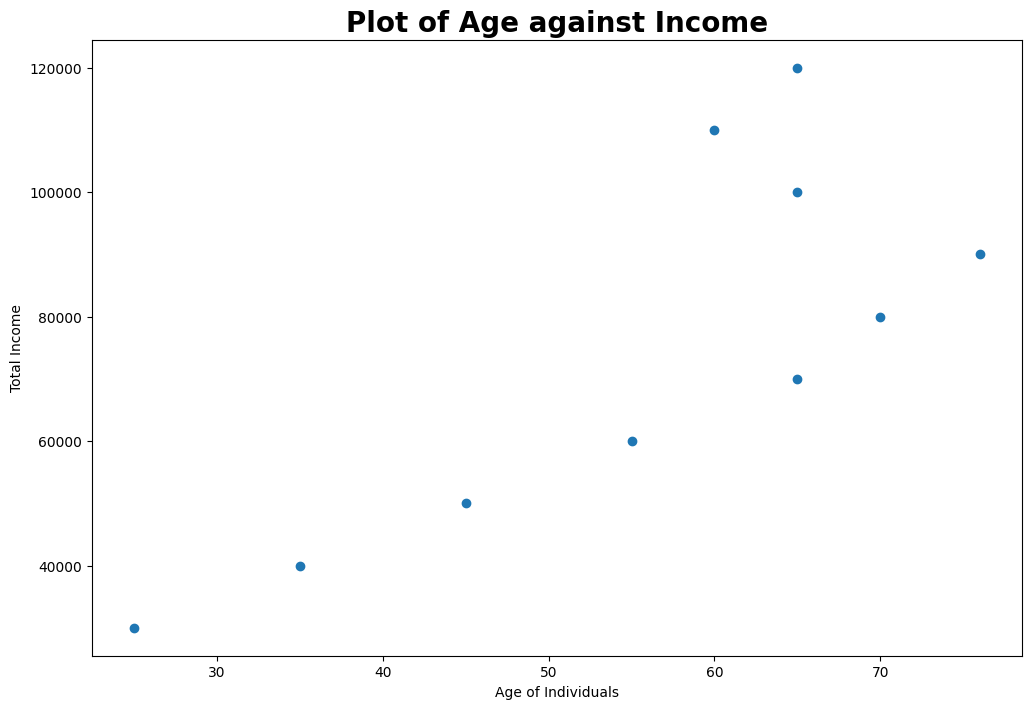

In [8]:
# Scatter plot of age and income

fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(x='Age',y='Income',data=df)
ax.set(xlabel="Age of Individuals",ylabel="Total Income")
plt.title(label="Plot of Age against Income",
          fontdict={'fontsize':20, 'fontweight':'bold'})
plt.show()

Average income of over 50 males is $92500.00
Average income of over 50 females is $86666.67


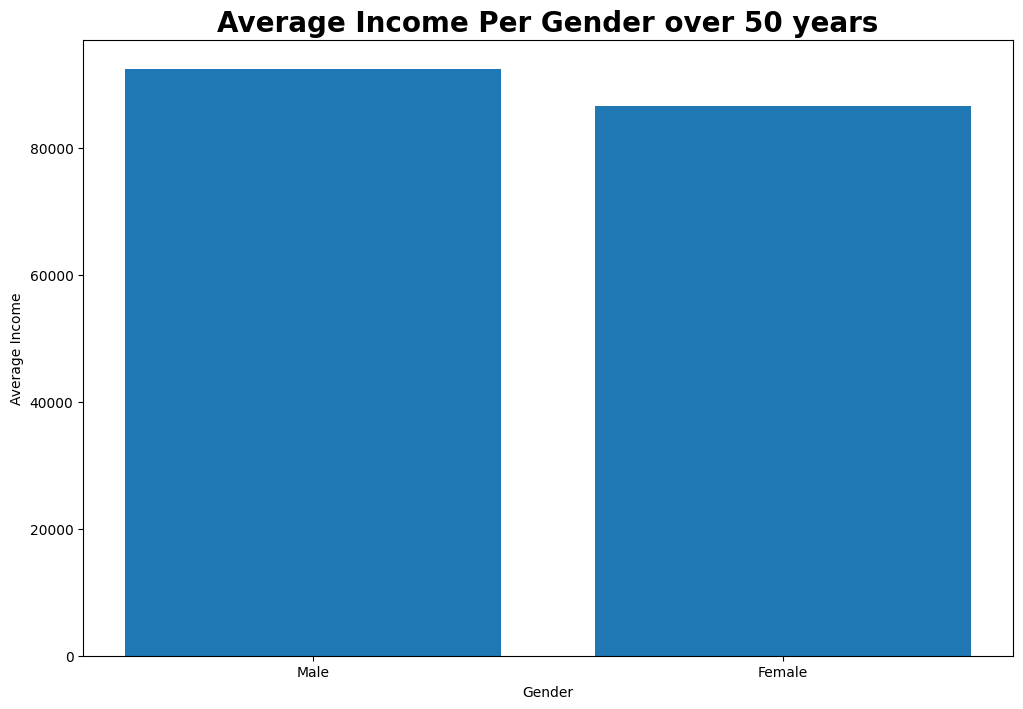

In [9]:
# Barplot of average income of over 50 individuals for each gender

# Average income of over 50 males
avg_income_o50_male = df[(df['Gender']=='M') & (df['Age']>50)]['Income'].mean()

# Average income of over 50 females
avg_income_o50_female = df[(df['Gender']=='F') & (df['Age']>50)]['Income'].mean()

print(f"Average income of over 50 males is ${avg_income_o50_male:.2f}")
print(f"Average income of over 50 females is ${avg_income_o50_female:.2f}")

# Data frame of average income of both genders
data = {'Gender':['Male','Female'], 'Avg_Income':[avg_income_o50_male,avg_income_o50_female]}
bar_df = pd.DataFrame(data)

# Plot the data
fig,ax = plt.subplots(figsize=(12,8))
ax.bar(x=bar_df['Gender'],height=bar_df['Avg_Income'])
ax.set(xlabel='Gender',ylabel='Average Income')
plt.title(label="Average Income Per Gender over 50 years",
          fontdict={'fontsize':20, 'fontweight':'bold'})
plt.show()